In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# OR neuron model with training
class Neuron:
    def __init__(self):
        # Set random seed for reproducibility
        np.random.seed(42)
        # Initialize weights and bias randomly
        self.weights = np.random.randn(2)
        self.bias = np.random.randn()
        self.errors = []
    
    def predict(self, x1, x2):
        z = self.weights[0] * x1 + self.weights[1] * x2 + self.bias
        # Apply sigmoid function
        y_prob = sigmoid(z)
        # Apply threshold to get binary output
        y_pred = 1 if y_prob > 0.5 else 0
        return y_pred
    
    
    def train(self, inputs, labels, learning_rate=0.1, epochs=10000):
        for _ in range(epochs):
            total_error = 0

            for x, y_true in zip(inputs, labels):
                x1, x2 = x
                z = self.weights[0] * x1 + self.weights[1] * x2 + self.bias
                y_pred = sigmoid(z)
                # y_pred = 1 if sigmoid(z) > 0.5 else 0

            
                # Calculate gradients
                error = y_pred - y_true
                d_weights = error * sigmoid_derivative(z) * np.array([x1, x2])
                d_bias = error * sigmoid_derivative(z)
                total_error += error**2
                
                # Update weights and bias
                self.weights -= learning_rate * d_weights
                self.bias -= learning_rate * d_bias

            # strore the total error for each epoch
            self.errors.append(total_error)

                    # the number of consecutive correct classifications
        

        for train, target in cycle(zip(self.train_data, self.target)):
            # end if all points are correctly classified
            if correct_counter == len(self.train_data):
                break

            output = self.classify(train)
            self.node_val = train

            if output == target:
                correct_counter += 1
            else:
                # if incorrectly classified, update weights and reset correct_counter
                self.update_weights(target, output)
                correct_counter = 0
                
    def plot_errors(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.errors, label='Total Squared Error', color='blue')
        plt.xlabel('Epochs')
        plt.ylabel('Total Squared Error')
        plt.title('Error Reduction Over Time During Training')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_decision_boundary(self, inputs, labels):
        # Generate a grid of points
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        
        # Predict outputs for each point in the grid
        zz = np.array([self.predict(x1, x2) for x1, x2 in zip(xx.ravel(), yy.ravel())])
        zz = zz.reshape(xx.shape)
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(8, 8))
        fig.patch.set_facecolor('black')  # Set figure background to black
        ax.set_facecolor('black')  # Set axes background to black
        
        # Plot the decision boundary
        contour = ax.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['purple', 'lightgreen'], alpha=0.3)
        # contour = ax.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['#B39DDB', '#FFCC80'], alpha=0.7)

        
        # Plot the original data points
        for (x1, x2), label in zip(inputs, labels):
            ax.scatter(x1, x2, color='purple' if label == 0 else 'lightgreen', edgecolor='white', s=200)
        
        # Set plot labels and limits
        ax.set_xlabel('$x_1$', fontsize=14, color='pink')
        ax.set_ylabel('$x_2$', fontsize=14, color='pink')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        
        # Set equal aspect ratio
        ax.set_aspect('equal', adjustable='box')
        
        # Set axis and grid colors
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['right'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        
        # Set the title and show the plot
        ax.set_title('Decision Boundary for XOR Neuron', color='white')
        plt.show()


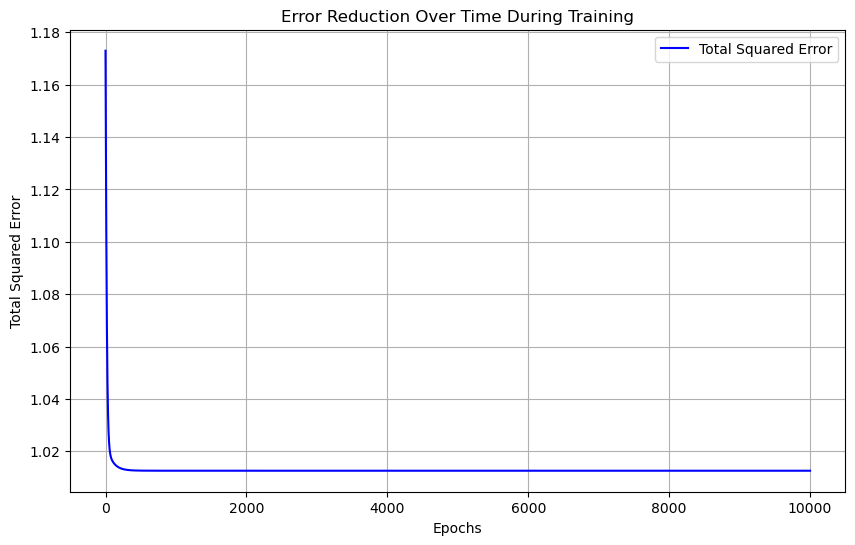

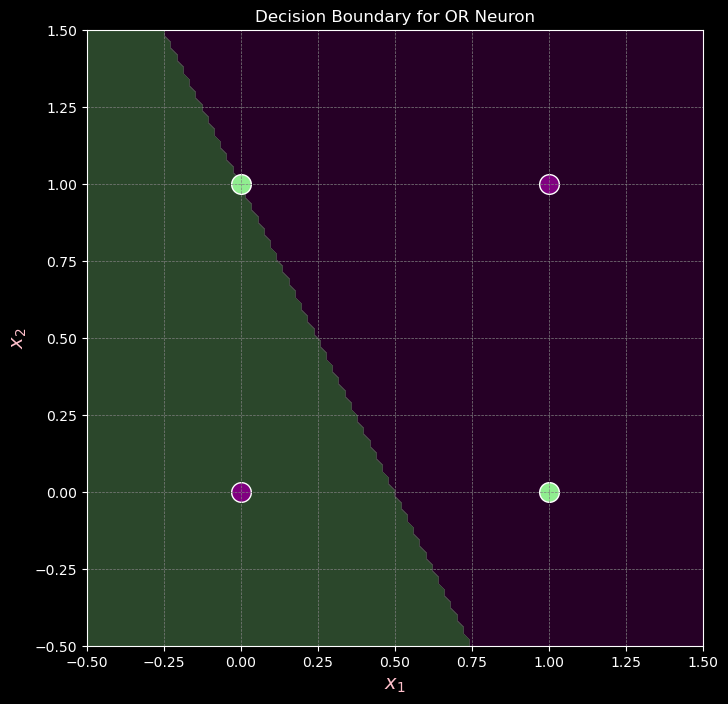

x1 x2 | y_pred
0  0  | 1.0
0  1  | 0.0
1  0  | 0.0
1  1  | 0.0


In [7]:
# Training data for OR gate
inputs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
labels = np.array([0, 1, 1, 0])

# Initialize the neuron
XORneuron = Neuron()

# Train the neuron
XORneuron.train(inputs, labels)

XORneuron.plot_errors()

XORneuron.plot_decision_boundary(inputs, labels)

# Test the trained neuron
print("x1 x2 | y_pred")
for x1, x2 in inputs:
    y_pred = XORneuron.predict(x1, x2)
    
    print(f"{x1}  {x2}  | {y_pred:.1f}")

In [13]:
def plot_decision_boundary(inputs, labels):
    # Generate a grid of points
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict outputs for each point in the grid
    zz = np.array([XORneuron.predict(x1, x2) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    zz = zz.reshape(xx.shape)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8))
    fig.patch.set_facecolor('black')  # Set figure background to black
    ax.set_facecolor('black')  # Set axes background to black
    
    # Plot the decision boundary
    contour = ax.contour(xx, yy, zz, levels=[0.1], colors=['orange'], linestyles=['--'])
    
    # Plot the original data points
    for (x1, x2), label in zip(inputs, labels):
        ax.scatter(x1, x2, color='purple' if label == 0 else 'lightgreen', edgecolor='white', s=200)
    
    # Set plot labels and limits
    ax.set_xlabel('$x_1$', fontsize=14, color='pink')
    ax.set_ylabel('$x_2$', fontsize=14, color='pink')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Set equal aspect ratio
    ax.set_aspect('equal', adjustable='box')
    
    # Set axis and grid colors
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Set the title and show the plot
    ax.set_title('Decision Boundary for XOR Neuron', color='white')
    plt.show()

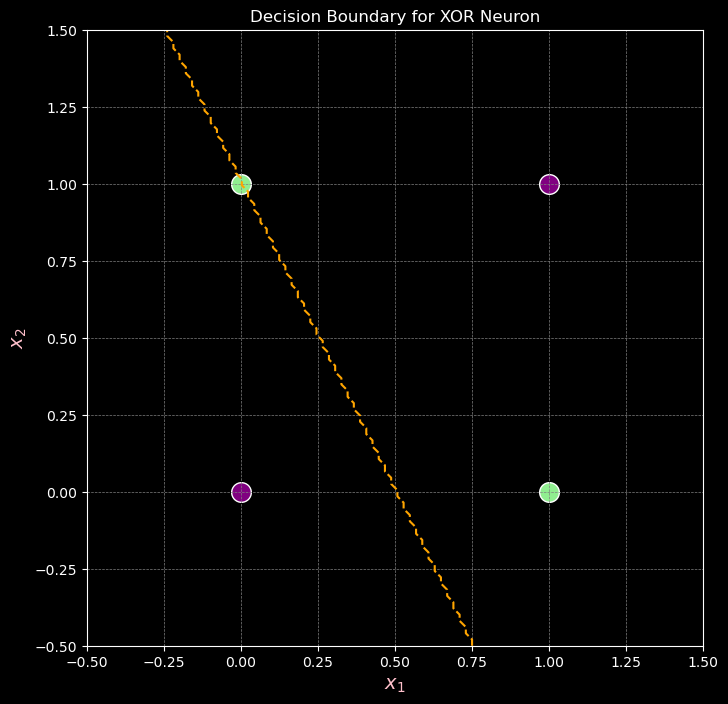

In [14]:
# Points and their classifications
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])  # Corresponding OR gate outputs

# # Create the plot
plot_decision_boundary(inputs, labels)

# # Colors for the points
# colors = ['purple' if label == 0 else 'lightgreen' for label in labels]

# # Create the plot with a black background
# fig, ax = plt.subplots()
# fig.patch.set_facecolor('black')
# ax.set_facecolor('black')

# # Plotting the points
# ax.scatter(points[:, 0], points[:, 1], color=colors, s=200, edgecolors='black')

# # Draw the decision boundary line
# x_values = np.linspace(-0.1, 1.1, 100)
# y_values = 
# # This is the decision boundary line
# # use XORneuron.plot_decision_boundary(inputs, labels) to plot the decision boundary



# # ax.plot(x_values, y_values, 'orange', linestyle='--')

# # Annotating the axes
# ax.axhline(0, color='white', linewidth=0.5)
# ax.axvline(0, color='white', linewidth=0.5)
# ax.set_xlim(-0.1, 1.1)
# ax.set_ylim(-0.1, 1.1)

# # Set equal aspect ratio for x and y axes
# ax.set_aspect('equal')

# # Labels and title
# ax.set_xlabel('$x_1$', fontsize=14, color='pink')
# ax.set_ylabel('$x_2$', fontsize=14, color='pink')
# ax.set_xticks([0, 1])
# ax.set_yticks([0, 1])
# ax.tick_params(colors='white')

# # Display the plot
# ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
# plt.show()